<a href="https://colab.research.google.com/github/rtcastillo1/Data-Graduation/blob/main/Simple_SFC_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# SFC Test - Basic model (Lavoie et al)
# The point of this model is to demonstrate SFC modeling.

import numpy as np

def sfcsimple(gov, sav):
    """
    Perform a one-period simulation of the SFC model.
    """
    g = gov
    h0 = sav
    theta = 0.2
    alpha1 = 0.6
    alpha2 = 0.4

    # Construct and solve the linear model
    AA = np.array([
        [1, -1,  0,    0],
        [-theta, 0, 1, 0],
        [1,  0, -1, -1],
        [0, -1,  0, alpha1]
    ])
    bb = np.array([g, 0, 0, -alpha2 * h0])
    solution0 = np.linalg.solve(AA, bb)

    # Solve for the savings functions
    dhs = g - solution0[2]
    dhh = solution0[3] - solution0[1]
    h1 = dhh + h0

    # Display simulation results
    print("SIMULATION RESULT")
    print(f"G is {g}.")
    print(f"Y is {solution0[0]}.")
    print(f"T is {solution0[2]}.")
    print(f"YD is {solution0[3]}.")
    print(f"C is {solution0[1]}.")
    print(f"ΔH_s is {dhs}.")
    print(f"ΔH_h is {dhh}.")
    print(f"H is {h1}.")

    # Return all values
    return np.concatenate((solution0, [dhs, dhh, h1]))


SIMULATION RESULT
G is 20.
Y is 38.46153846153846.
T is 7.692307692307693.
YD is 30.769230769230766.
C is 18.46153846153846.
ΔH_s is 12.307692307692307.
ΔH_h is 12.307692307692307.
H is 12.307692307692307.
SIMULATION RESULT
G is 20.
Y is 47.928994082840234.
T is 9.585798816568047.
YD is 38.34319526627219.
C is 27.928994082840237.
ΔH_s is 10.414201183431953.
ΔH_h is 10.414201183431953.
H is 22.72189349112426.
SIMULATION RESULT
G is 20.
Y is 55.93991807009559.
T is 11.187983614019117.
YD is 44.75193445607647.
C is 35.93991807009559.
ΔH_s is 8.812016385980883.
ΔH_h is 8.812016385980883.
H is 31.533909877105142.
SIMULATION RESULT
G is 20.
Y is 62.7183922131578.
T is 12.543678442631556.
YD is 50.174713770526246.
C is 42.7183922131578.
ΔH_s is 7.456321557368444.
ΔH_h is 7.456321557368447.
H is 38.990231434473586.
SIMULATION RESULT
G is 20.
Y is 68.45402418036429.
T is 13.690804836072857.
YD is 54.763219344291436.
C is 48.45402418036429.
ΔH_s is 6.309195163927143.
ΔH_h is 6.309195163927143.
H

In [ ]:
# N-PERIOD SIMULATION
h0 = 0
gov = 20
maxiter = 100
sims = np.zeros((7, maxiter))

for i in range(maxiter):
    simresult = sfcsimple(gov, h0)
    sims[:, i] = simresult
    h0 = simresult[6]  # update h0 for the next period


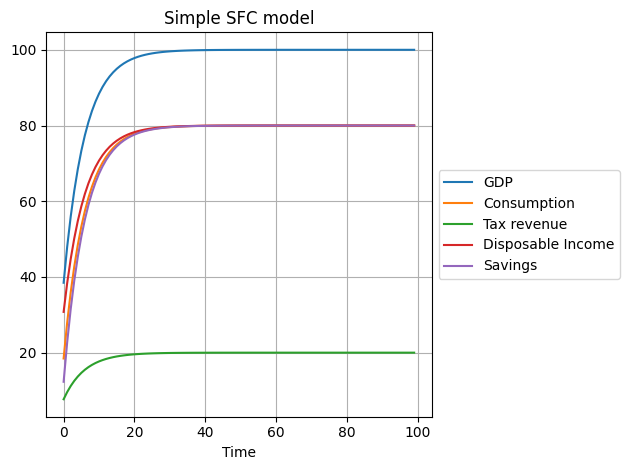

In [11]:
# PLOT
import matplotlib.pyplot as plt
time = range(maxiter)             # time periods
y = sims[0,:]
c = sims[1,:]
t = sims[2,:]
yd = sims[3,:]
sav = sims[6,:]

plt.plot(time, y, label = 'GDP')
plt.plot(time, c, label = 'Consumption')
plt.plot(time, t, label = 'Tax revenue')
plt.plot(time, yd, label = 'Disposable Income')
plt.plot(time, sav, label = 'Savings')

plt.title("Simple SFC model")
plt.xlabel("Time")
plt.legend()
plt.grid(True)
# Move legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Adjust layout to make room for the legend
plt.tight_layout()
plt.show()

